# Ethereum Analysis
<big>In this notebook, we will take a look at the financial hisory of Ethereum since its release in 2015. The file we will use for this analysis will be ether.csv, which contains data from  7-8-2015\
to 26-2-2021. In the first part, we inspect the data, see what type each column is, check if there are null values, etc. In the second part, we explore the data by plotting them into different diagramms.</big> 

## Part 1: Data Inspection / Data Cleaning


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
PATH = "data/ether.csv"   # path to the file
df = pd.read_csv(PATH)
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,EMA10,EMA30,ATR
0,2015-08-07,2.83,3.54,2.52,2.77,164329.0,166610555.0,2.770000,2.770000,1.020000
1,2015-08-08,2.79,2.80,0.71,0.75,674188.0,45486894.0,2.402727,2.639677,1.096429
2,2015-08-09,0.71,0.88,0.63,0.70,532170.0,42399573.0,2.093140,2.514537,1.035969
3,2015-08-10,0.71,0.73,0.64,0.71,405283.0,42818364.0,1.841660,2.398115,0.968400
4,2015-08-11,0.71,1.13,0.66,1.07,1463100.0,64569288.0,1.701359,2.312430,0.932800


In [9]:
print("Shape: ", df.shape)   # df.shape will return a tuple such as (num_of_rows, num_of_columns)
print("\nStatistical data:")
df.describe()

Shape:  (2031, 10)

Statistical data:


,Open,High,Low,Close,Volume,Market Cap,EMA10,EMA30,ATR
count,2031.000000,2031.000000,2031.000000,2031.000000,2.031000e+03,2.031000e+03,2031.000000,2031.000000,2031.000000
mean,256.779567,266.318981,246.281733,257.424870,5.419386e+09,2.690408e+10,253.743339,245.828106,19.027998
std,307.266941,320.936485,291.113629,308.220089,8.094117e+09,3.333261e+10,298.560919,276.172565,28.902990
min,0.430000,0.480000,0.420000,0.430000,1.021280e+05,3.221363e+07,0.520577,0.643627,0.041259
25%,12.850000,13.210000,12.495000,12.845000,2.825040e+07,1.083768e+09,12.727926,12.389711,1.092769
50%,184.800000,188.960000,180.250000,185.030000,1.833680e+09,1.968881e+10,183.930373,184.337582,9.567089
75%,331.985000,341.470000,316.925000,332.875000,7.922272e+09,3.279631e+10,322.094381,311.023706,21.230905
max,1959.900000,2036.290000,1896.680000,1960.160000,6.073363e+10,2.249103e+11,1861.169935,1658.268884,164.630513


In [63]:
df['Volume'] = df['Volume'] / 1000   # make volume to show thousands (1K)
df['Market Cap'] = df['Market Cap'] / 1000000  # make market cap to show millions (1M)

In [64]:
df.dtypes   # to check the type of each column

Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap    float64
EMA10         float64
EMA30         float64
ATR           float64
EMA50         float64
EMA200        float64
dtype: object

In [13]:
df['Date'] = pd.to_datetime(df['Date'])   # we change the Date column from string to Date

In [25]:
# to check for null values
df[df.isna() == True].count()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
EMA10         0
EMA30         0
ATR           0
dtype: int64

In [30]:
df.nunique()   # let's see how many unique values each column has

Open          1835
High          1826
Low           1825
Close         1846
Volume        2031
Market Cap    2031
EMA10         2031
EMA30         2031
ATR           2031
dtype: int64

In [66]:
df.set_index('Date', inplace=True)   # since most of our diagramms will be based on date, we can set it as index of the dataframe
df.head()

,Open,High,Low,Close,Volume,Market Cap,EMA10,EMA30,ATR,EMA50,EMA200
Date,,,,,,,,,,,
2015-08-07,2.83,3.54,2.52,2.77,164.329,166.610555,2.770000,2.770000,1.020000,2.770000,2.770000
2015-08-08,2.79,2.80,0.71,0.75,674.188,45.486894,2.402727,2.639677,1.096429,2.690784,2.749900
2015-08-09,0.71,0.88,0.63,0.70,532.170,42.399573,2.093140,2.514537,1.035969,2.612714,2.729503
2015-08-10,0.71,0.73,0.64,0.71,405.283,42.818364,1.841660,2.398115,0.968400,2.538098,2.709409
2015-08-11,0.71,1.13,0.66,1.07,1463.100,64.569288,1.701359,2.312430,0.932800,2.480526,2.693096


<big>At this point, we are ready to start the actual analysis on the data. However, we can already expect specific charceristics from specific diagramms. For example, if we look at the nnumber of unique 
values in each column, we can see that in 2031 rows, we have only 1825 different values for the 'Low' column. That, indicates that we don't have a purely ascending lowest_price line throughout the years,
but instead, sometimes the price was the same as other days before. This will be better understood when we see observe the diagramms, so without any further ado, let's continue to the second part of this
notebook.</big>

## Part 2: Analyzing the history of Ethereum
<big>In this part, we will create some diagrammas that depict how opening, closing, lowest and highest price of the day were developing from day to day. We will also check that EMA10 and EMA30 columns are
relatively correct, which means that their lines should resemble the closing price's line. Additionaly, we will try to represent the changes in stability, liquidity and investors' interest from Ethereum's
release until the start of 2021, by plotting the volume by date and market capitalization by date diagramms.</big>

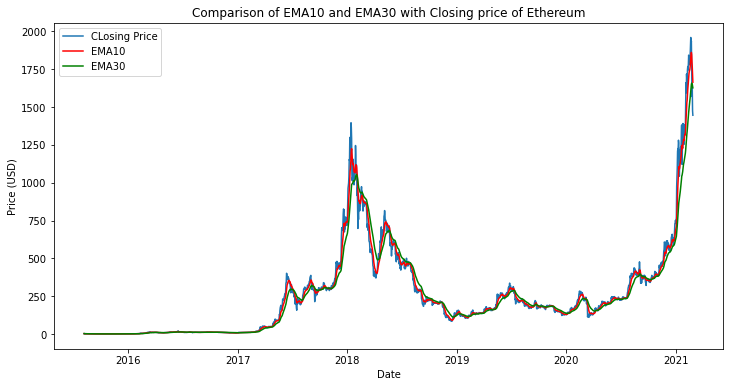

In [41]:
# first we check EMA10 and EMA30
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='CLosing Price')   # create closing price line
plt.plot(df['EMA10'], label='EMA10', color='r')      # create EMA10 line
plt.plot(df['EMA30'], label='EMA30', color='green')    # create EMA30 line
plt.legend()   # add legend to identify each line
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Comparison of EMA10 and EMA30 with Closing price of Ethereum')
plt.show()

<big>We see that their respective curves are similar indeed, with EMA10's one being closer to the closing price than EMA30. Of course his makes sense, since in EMAn, the higher the number  n, the more
suitable for long-term strategy EMA is. In general, 50-days and 200-days Exponential Moving Averages (EMAs) are used as indicators for long-term trends, while 12- and 26-days are more often used to create 
indicators like the moving average convergence divergence (MACD) and percentage price oscillator (PPO).</big>

<big>We can take a closer look to the previous diagramm, by plotting the curves for 2020-2021.</big>

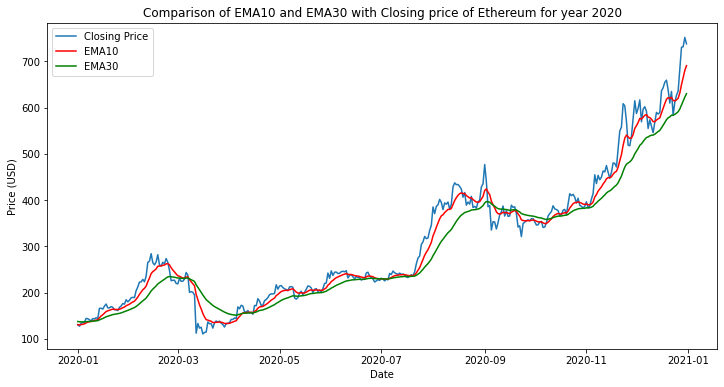

In [54]:
filtered_df = df.loc['2020-01-01':'2020-12-31']
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Close'], label='Closing Price')   # create closing price line
plt.plot(filtered_df['EMA10'], label='EMA10', color='r')      # create EMA10 line
plt.plot(filtered_df['EMA30'], label='EMA30', color='green')    # create EMA30 line
plt.legend()   # add legend to identify each line
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Comparison of EMA10 and EMA30 with Closing price of Ethereum for year 2020')
plt.show()

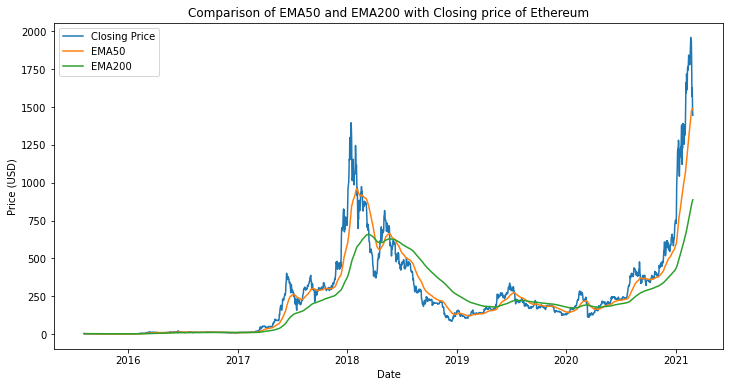

In [59]:
# now we will create EMA200 plot
def get_EMA(n, data):   # first we define a function for the creation of EMA
    '''
    This function takes a number of days n, and a dataframe,
    and computes the EMAn of the closing price of the df. For
    the first n days, it takes the actual closing values from df.
    Returns a list with all the EMAn values.
    '''
    smoothing = 2  # parameter for the calculation of EMA
    data_list = list(data['Close'])
    res = [data_list[0]]  # get the first element from the dataframe as initial value
    for i in range(1, data.shape[0]):
        multiplier = smoothing / (1+n)
        new_ema = data_list[i] * multiplier + res[i-1] * (1 - multiplier)  # formula of EMA
        res.append(new_ema)
    return res
df['EMA50'] = get_EMA(50, df)  # create a new column for  EMA50
df['EMA200'] = get_EMA(200, df)  # and  EMA200

# now we can compare them to the closing price
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price')
plt.plot(df['EMA50'], label='EMA50')
plt.plot(df['EMA200'], label='EMA200')
plt.legend()   # add legend to identify each line
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Comparison of EMA50 and EMA200 with Closing price of Ethereum')
plt.show()
    

<big>As we can see the new EMAs follow the closing price's curve, but not as strictly as EMA10 and EMA30. To compare all EMAs direclty with each other, we create the below diagramm
that shows the differencies betweem them.</big>

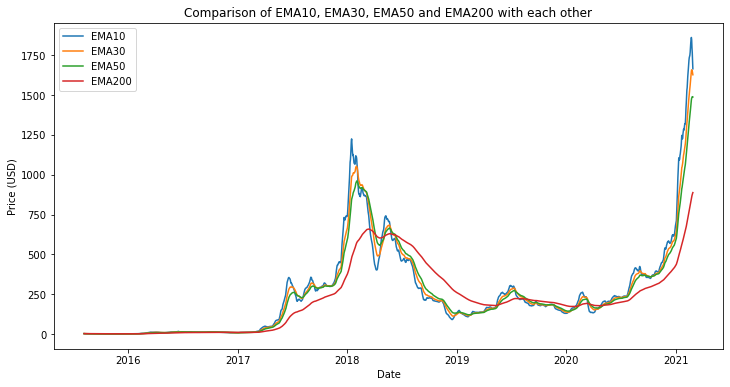

In [60]:
plt.figure(figsize=(12,6))
plt.plot(df['EMA10'], label='EMA10')
plt.plot(df['EMA30'], label='EMA30')
plt.plot(df['EMA50'], label='EMA50')
plt.plot(df['EMA200'], label='EMA200')
plt.legend()   # add legend to identify each line
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Comparison of EMA10, EMA30, EMA50 and EMA200 with each other')
plt.show()

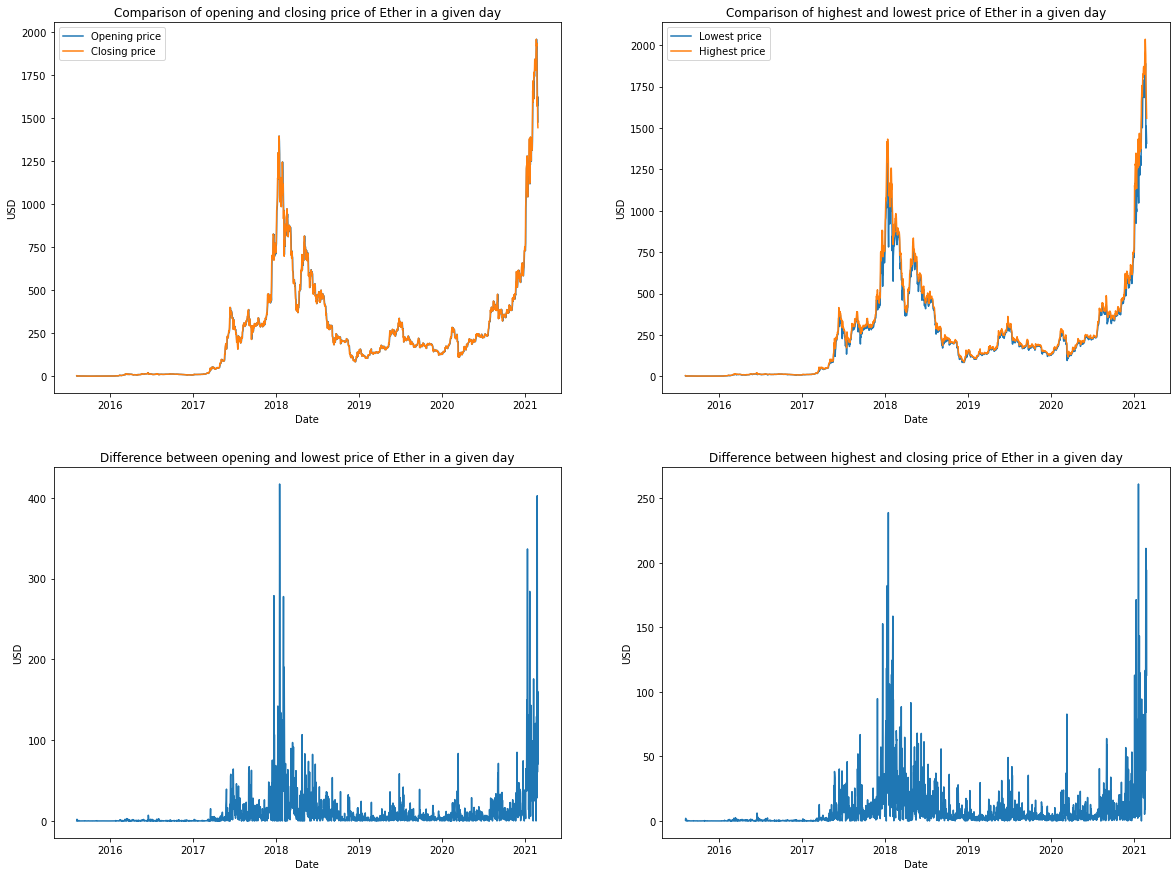

In [72]:
# now, it is time to check the opening and closing prices, as well as the highest and lowest price
# for that puprose, we make the four diagrams below
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(20,15))  # figure of dimensions 2x2 -> 4 diagramms

# for the first diagramm, we compare opening and closing prices
ax1.plot(df['Open'], label='Opening price')
ax1.plot(df['Close'], label='Closing price')
ax1.legend()
ax1.set_xlabel('Date')
ax1.set_ylabel('USD')
ax1.set_title('Comparison of opening and closing price of Ether in a given day')

# for the second diagramm, we compare highest and lowest price for each day
ax2.plot(df['Low'], label='Lowest price')
ax2.plot(df['High'], label='Highest price')
ax2.legend()
ax2.set_xlabel('Date')
ax2.set_ylabel('USD')
ax2.set_title('Comparison of highest and lowest price of Ether in a given day')

# in the third diagramm we see the difference between opening and lowest price
ax3.plot(df['Open']-df['Low'])
ax3.set_xlabel('Date')
ax3.set_ylabel('USD')
ax3.set_title('Difference between opening and lowest price of Ether in a given day')

# in the last diagramm, we see respresent the difference between highest and closing price 
ax4.plot(df['High']-df['Close'])
ax4.set_xlabel('Date')
ax4.set_ylabel('USD')
ax4.set_title('Difference between highest and closing price of Ether in a given day')

plt.show()

<big>From the  first diagramm, we can infere that opening and closing price of Ethereum is almost equal.The same can be said about highest and lowest price, although the difference between the two is 
slightly bigger than the previou one.The bottom diagramms show that generally, opening price and closing price don't have much difference from lowest and highest price respectively. This, alongside the
previous observations, lead us to the assumption that untill 2017 and during the period 2019-2021, ther has been little interest in Ethereum. Specifically, it seems that Ether made its first successfull
debut in the mid of 2017, gained popularity until 2018 and then once again it's price dropped to low levels. From 2020, it sees a rise in its value, with 2021 demonstrating an extreme growth. However, it
is important to also examine the volatility and investors' interest toward Ethereum, since they may  partially explain the previous results.</big>

<big>Before we jump into volume and market capitalization, it is interesting to see the curve of the actual difference between highest and lowest, and opening and closing price.</big>

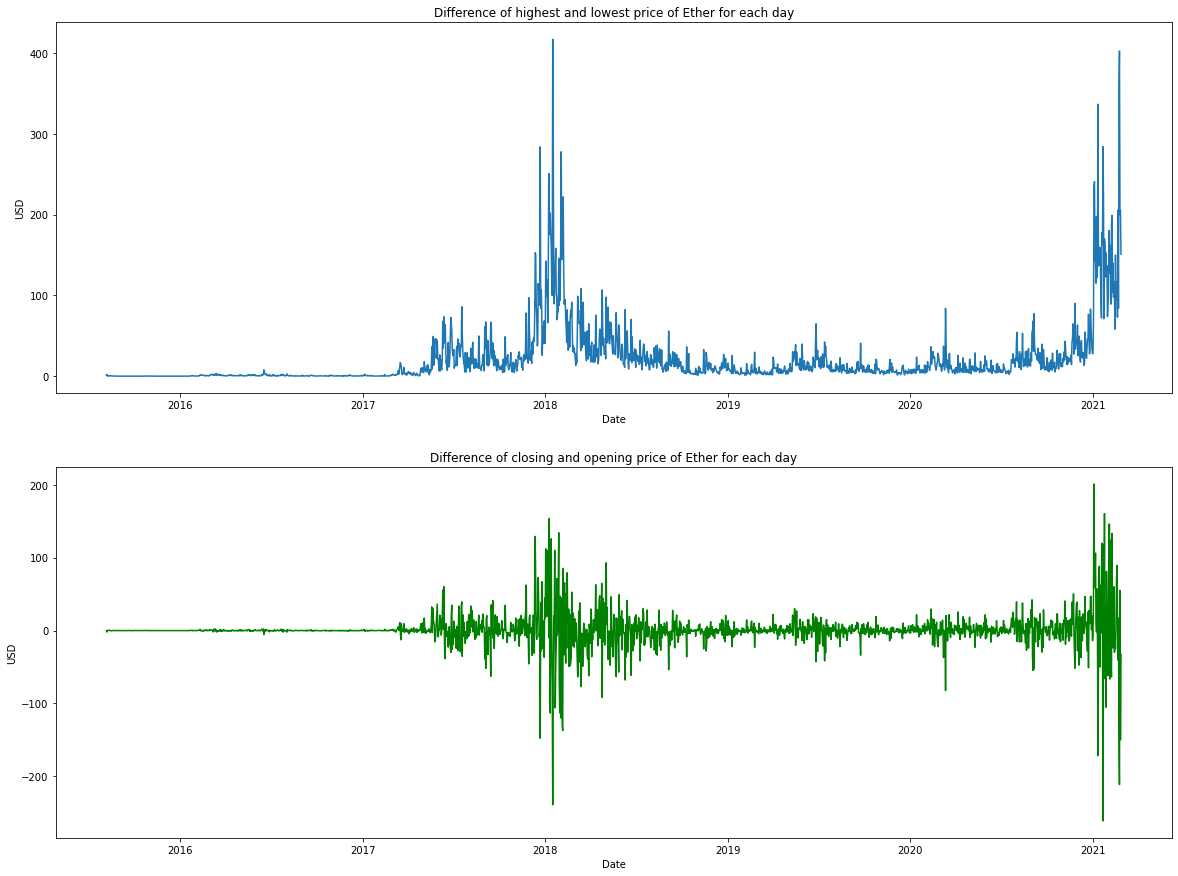

In [51]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(20,15))  # two plots, one below the other

# first plot, show difference between high and low price
ax1.plot(df['High']-df['Low'])
ax1.set_xlabel('Date')
ax1.set_ylabel('USD')
ax1.set_title('Difference of highest and lowest price of Ether for each day')

# second plot, show difference between opening and closing price
ax2.plot(df['Close']-df['Open'], 'g')
ax2.set_xlabel('Date')
ax2.set_ylabel('USD')
ax2.set_title('Difference of closing and opening price of Ether for each day')

plt.show()

<big>While price is a strong indicator of a coin's development and future, volume and  market capitalization can also be extremely useful.Typically, volume is the number of transactions that occured
over a given timeframe (in our case, 24 hours) and is considered to represent the investors' interest in a specific stock. We can think of it as a measure of liquidity. The higher the volume, the more
liquid the stock (or Ethereum in this case) is. High volume stocks are the best for short-term trading, since there are a lot of buyers and sellers.Additionaly, if a stock with high volume is rising, 
this means that there is buying pressure as investor demand pushes the stock to higher and higher prices. One the other hand, if the price of a stock with a high trading volume is falling, it means more
investors are selling their shares.</big>

<big>Apart from volume, it is also important to pay attention to the volatility of a coin. Market capitalization is the total value of all the coins that have been mined, and can be calculated by 
multiplying the number of coins in circulation, by the current market price of a single coin. It indicates how stable (or unstable) the coin is. In other words, currencies with high market cap, are 
more stable than those with a small one. We must also note that when a currency is unstable, it can be easilly affected by the shifts of the market and can see huge gains or dramatic losses in their
wake. Thus it is safer to get involved with stable currencies with high market cap.</big>

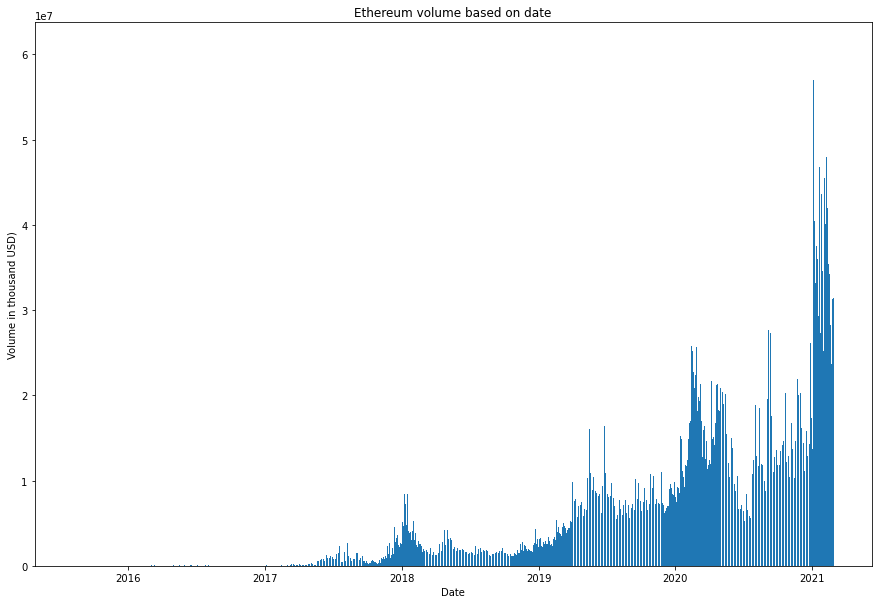

In [67]:
# first we create a bar chart to observe the growth of BTC volume
pos_df = df[df['Volume'] > 0]   # we create a new df (positive_df -> pos_df) were volume is greater than zero
plt.figure(figsize=(15,10))
plt.bar(pos_df.index, pos_df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume in thousand USD)')
plt.title('Ethereum volume based on date')
plt.show()

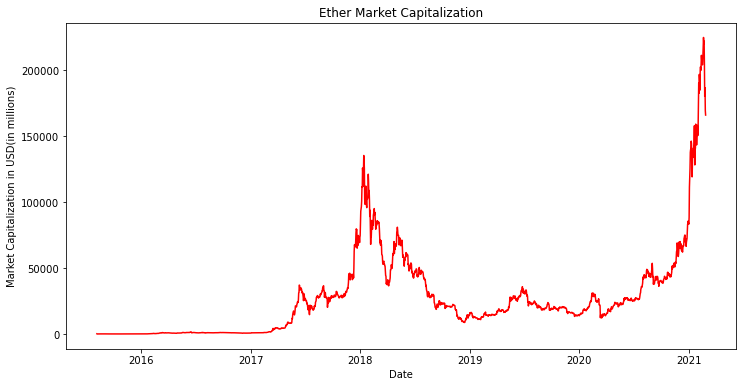

In [73]:
# now we will display the curve of market capitalization of Ethereum based on date
plt.figure(figsize=(12,6))
plt.plot(df['Market Cap'], 'r')
plt.xlabel('Date')
plt.ylabel('Market Capitalization in USD(in millions)')
plt.title('Ether Market Capitalization')
plt.show()

<big>From the above, we can see that Ethereum gained popularity in the middle of 2017, then lost most of it in 2018-2019, then regained it again.From 2020 it has been in an rise, with 2021 being its most
successfull year until now. It is interesting that although in 2019 it gained more popularity than in 2017-2018, the market cap for the same period was almost as low as when it was first released. Based 
on that, we can assume that the low stability of Ethereum at that time stopped the price from rising, since it was not considered "safe-trading".</big>

## Final Notes
<big>Taking into consideration all of the previous results, we are able to understand the history of Ethereum theoretically and also visually. It seems that after its release, it met its first 
success in the mid of 2017, and then fall as quickly as it had risen. Then again, in 2020 it started gaining attention and its price was also increased, until 2021 when it was skyrocketed. Something 
similar was the case with Bitcoin, although  BTC's price was (and is) far higher than the Ether's one. The end of the curves, show that the fall has once again begun for Ethereum, but given the popularity of NFTs,
the trading of which requires Ethereum, we can expect it to grow again.</big>